## About

R data-munging idioms and their equvalents in pandas/python:

* Subset with multiple-choise `%in%`:
    * R: `subset(df, name %in% c("Andrew", "Andre"))
    * python: `df.query('name in ["Andrew", "Andre"]')` via [link](http://stackoverflow.com/a/23946500/551589)

## Set up

In [1]:
%qtconsole

/home/andrey/anaconda2/lib/python2.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [71]:
%matplotlib inline

## Imports

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ggplot import *

## Read data

In [4]:
df = pd.read_csv("data/babynames.csv")

## Basic statistics

Looking at the first samples:

In [5]:
df.head()

,year,sex,name,n,prop
0,1880,F,Mary,7065,0.072384
1,1880,F,Anna,2604,0.026679
2,1880,F,Emma,2003,0.020521
3,1880,F,Elizabeth,1939,0.019866
4,1880,F,Minnie,1746,0.017888


How many unique names are collected?

In [6]:
(df['name'].nunique(), df['name'].size)

(92600, 1792091)

In [19]:
df['name'].nunique() / float(df['name'].size)

0.05167148320035087

We might thhink that approx. 20 entries per name are collected. Should it be equal to the length of the years period?

In [23]:
df['year'].max() - df['year'].min()

133

Not really. That means there are many zero entries in `n` column for many names.

## Filter

### By a single name

In [47]:
df['name'].isin(['Andrew']).value_counts()

False    1791850
True         241
Name: name, dtype: int64

In [48]:
df.query('name == "Andrew"').shape

(241, 5)

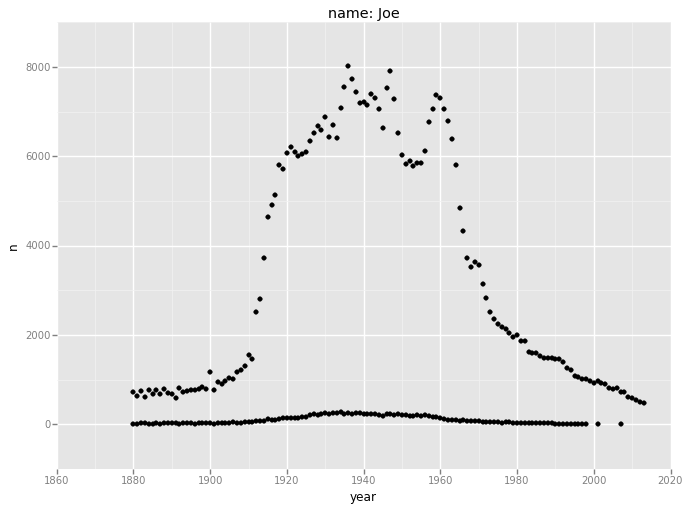

<ggplot: (8738974062893)>

In [119]:
ggplot(df.query('name == "Joe"'), aes(x = 'year', y = 'n')) + geom_point() + ggtitle("name: Joe")

Don't forget the names are given for two genders.

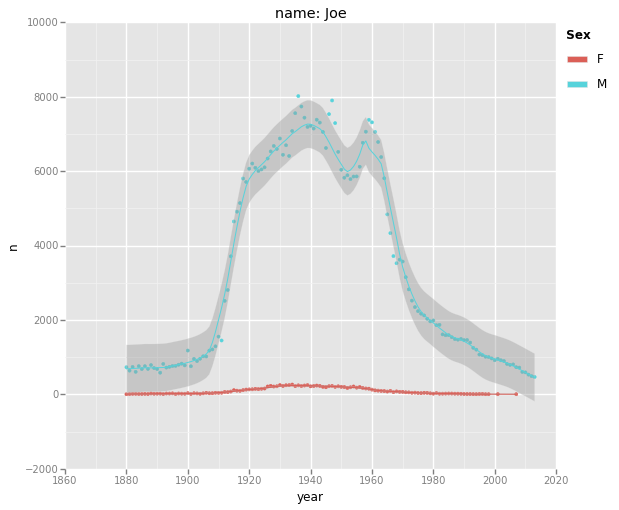

<ggplot: (8738974012825)>

In [125]:
ggplot(df.query('name == "Joe"'), aes(x = 'year', y = 'n', color = 'sex')) +\
    geom_point(size = 10) + geom_smooth(span = 0.1) + ggtitle("name: Joe")

Joe as a name for girls seems to be OK. What about Mary?

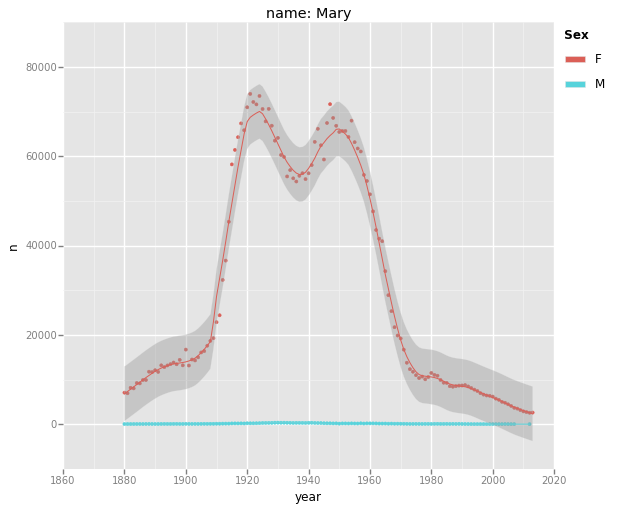

<ggplot: (8738974348201)>

In [126]:
ggplot(df.query('name == "Mary"'), aes(x = 'year', y = 'n', color = 'sex')) +\
    geom_point(size = 10) + geom_smooth(span = 0.1) + ggtitle("name: Mary")

Name Mary for boys? Let's do a bit more subsetting by `n < 1000` filter.

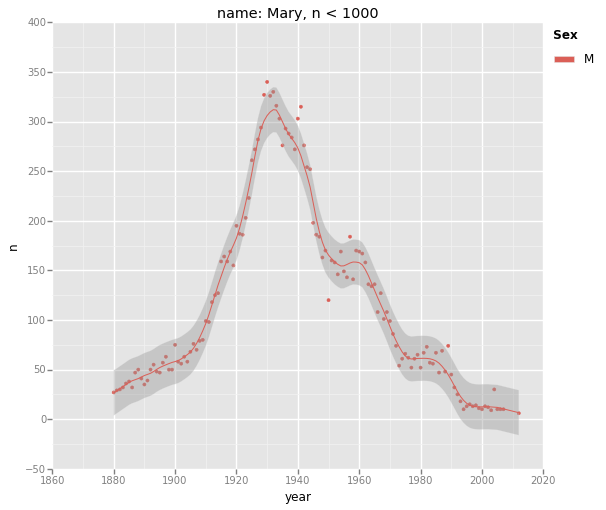

<ggplot: (8738974406329)>

In [127]:
ggplot(df.query('name == "Mary" & n < 1000'), aes(x = 'year', y = 'n', color = 'sex')) +\
    geom_point(size = 10) + geom_smooth(span = 0.1) + ggtitle("name: Mary, n < 1000")

### By multiple names

In [70]:
df.query('name in ["Andrew", "Andrey"]')

(431, 5)